Berhasil memuat processed.cleveland.data: 303 baris
Berhasil memuat processed.hungarian.data: 294 baris
Berhasil memuat processed.switzerland.data: 123 baris
Berhasil memuat processed.va.data: 200 baris


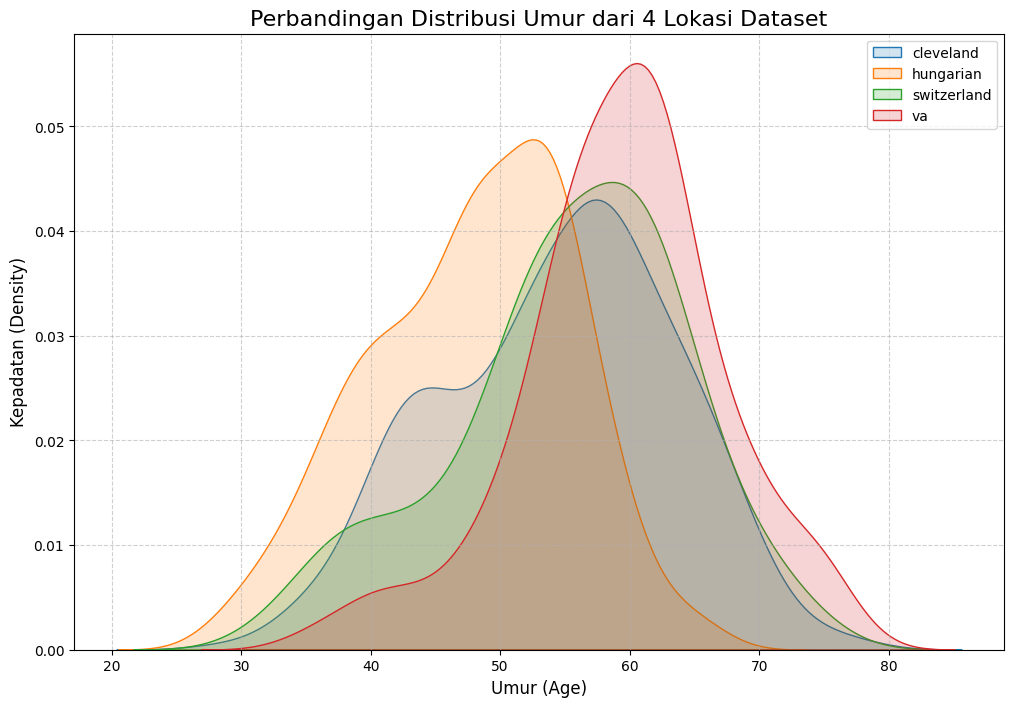

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Langkah 1: Siapkan Nama Kolom ---
# Data mentah ini tidak punya header, jadi kita definisikan manual
# Ini 14 kolom standar yang biasa dipakai
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# --- Langkah 2: Tentukan Path ke Folder Data ---
# Sesuaikan path ini dengan lokasi folder 'heart+disease' di komputer lo
data_folder = 'heart+disease/' 

# List file yang mau kita cek
files_to_check = [
    'processed.cleveland.data',
    'processed.hungarian.data',
    'processed.switzerland.data',
    'processed.va.data'
]

# --- Langkah 3: Muat Semua Dataset ke DataFrame terpisah ---
datasets = {}
for file in files_to_check:
    try:
        # Buat key yang lebih pendek (misal: 'cleveland') dari nama file
        key = file.split('.')[1]
        
        # Path lengkap ke file
        file_path = os.path.join(data_folder, file)
        
        # Muat CSV, definisikan nama kolom, dan set '?' sebagai NaN
        datasets[key] = pd.read_csv(file_path, header=None, names=column_names, na_values='?')
        
        print(f"Berhasil memuat {file}: {len(datasets[key])} baris")
    except FileNotFoundError:
        print(f"File {file} tidak ditemukan. Pastikan path '{data_folder}' benar.")

# --- Langkah 4: Analisis dan Visualisasi Distribusi Umur ---
# Cek apakah ada dataset yang berhasil dimuat
if datasets:
    plt.figure(figsize=(12, 8))
    
    for name, df in datasets.items():
        # Plotting distribusi umur untuk setiap dataset
        sns.kdeplot(df['age'], label=name, fill=True, alpha=0.2)

    plt.title('Perbandingan Distribusi Umur dari 4 Lokasi Dataset', fontsize=16)
    plt.xlabel('Umur (Age)', fontsize=12)
    plt.ylabel('Kepadatan (Density)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()